In [4]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df= sns.load_dataset('titanic')

In [5]:
print(df.shape)
print(df.dtypes)
df.head()

(891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.describe()

df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [8]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


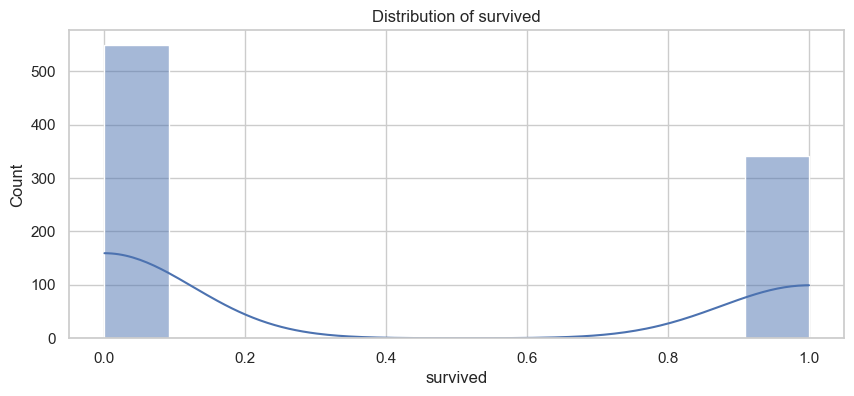

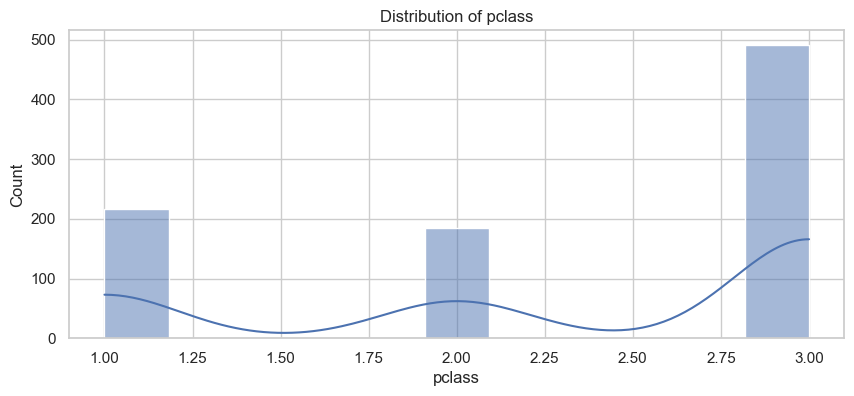

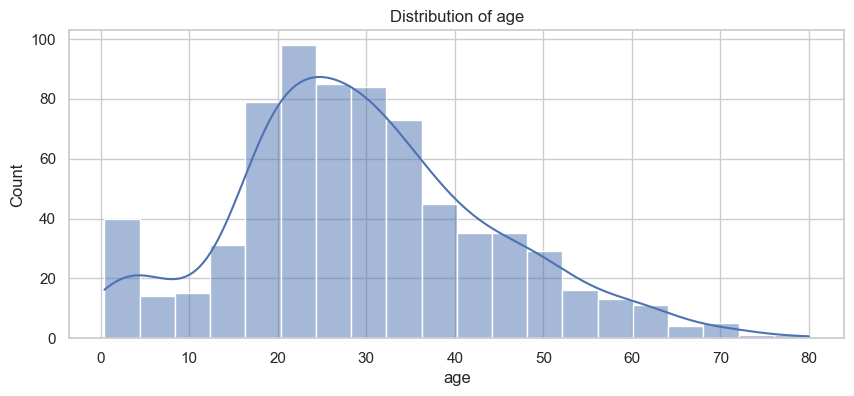

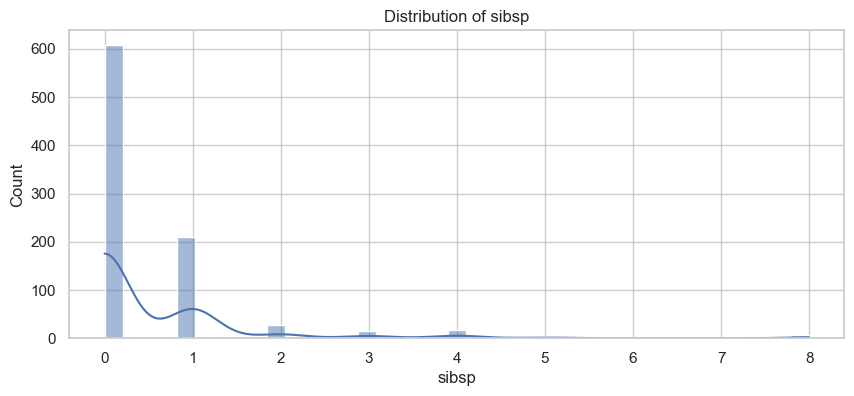

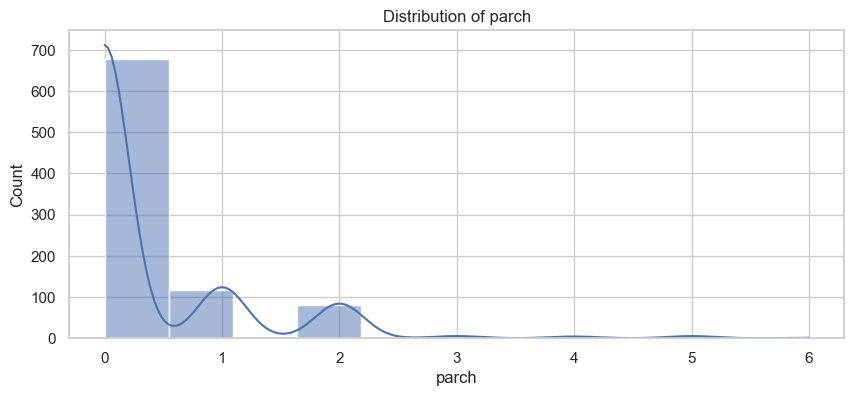

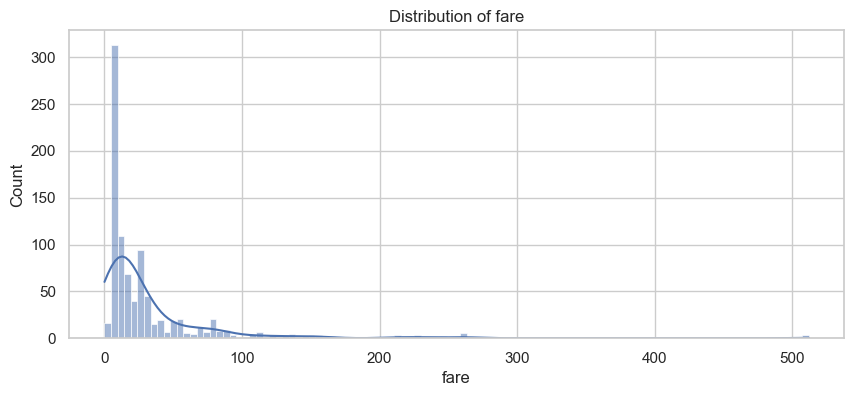

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

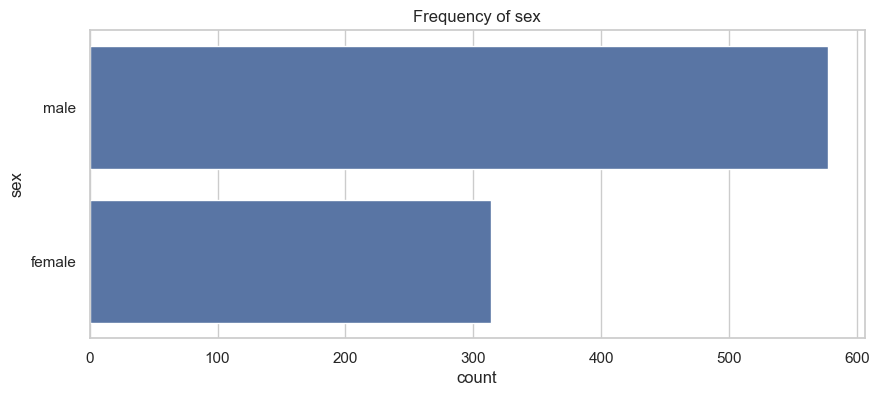

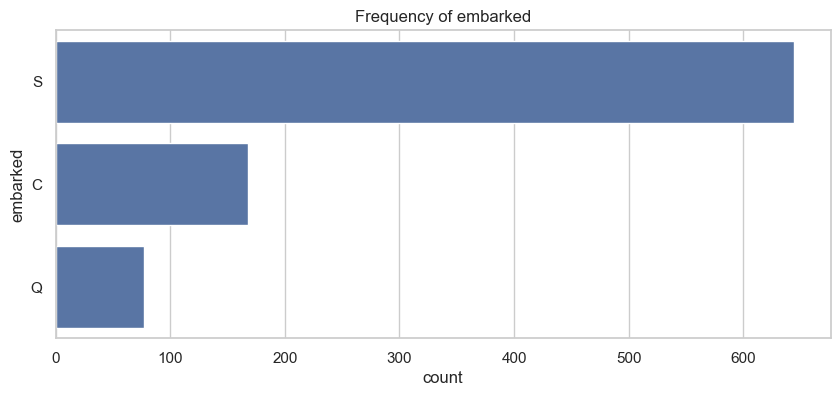

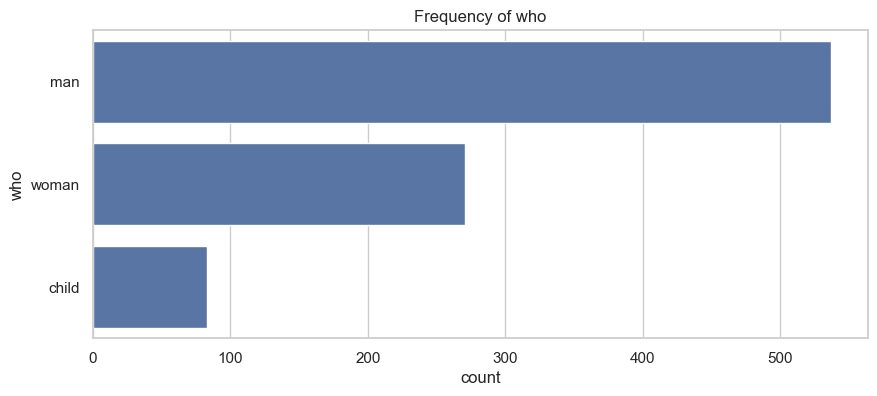

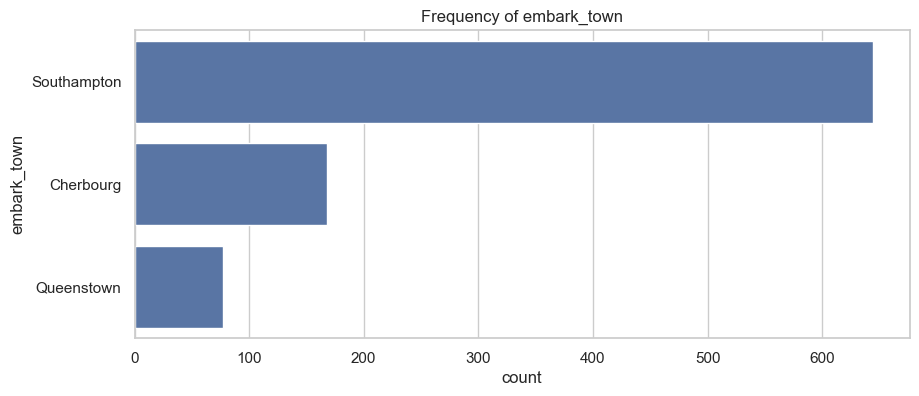

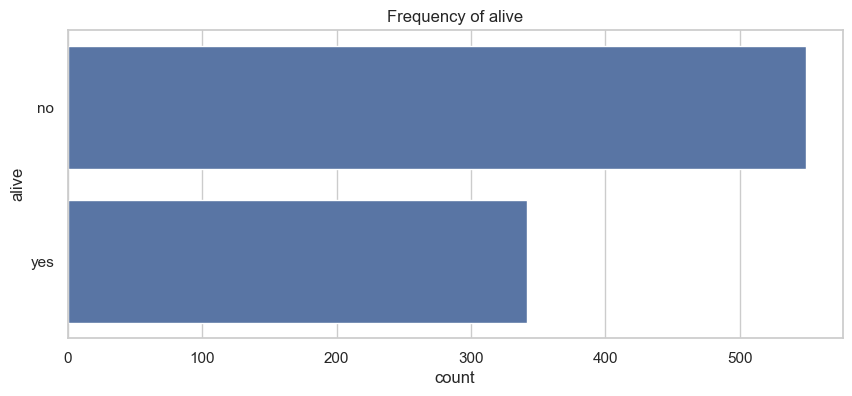

In [12]:
categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.show()

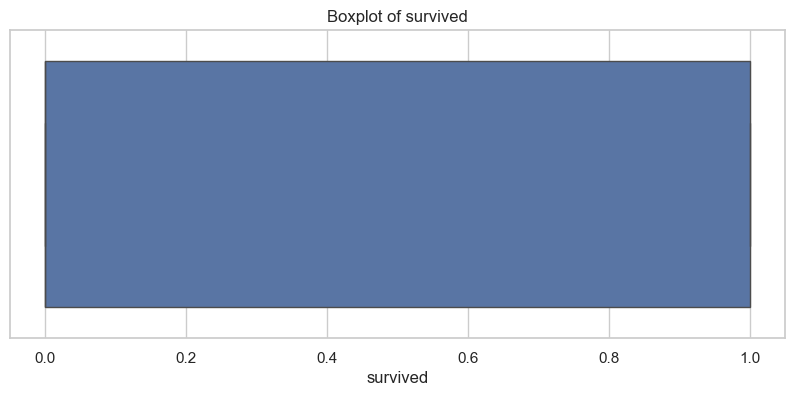

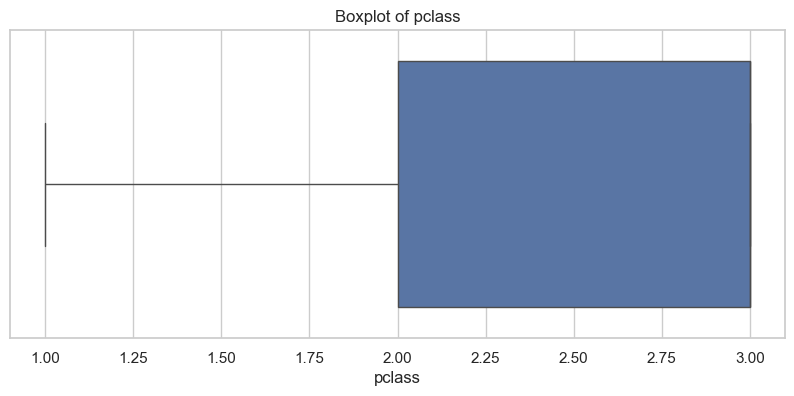

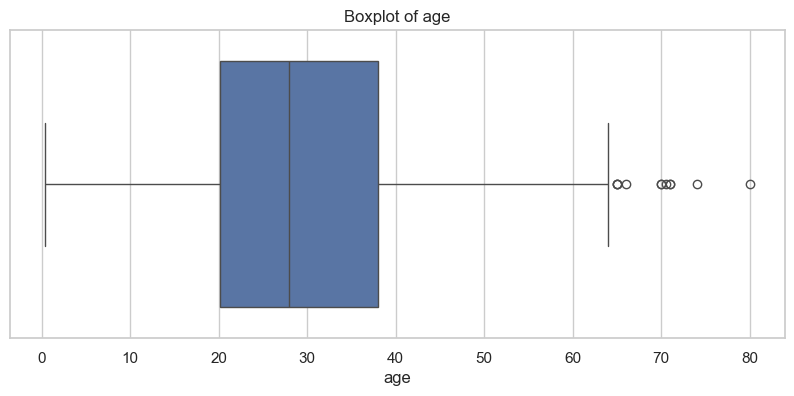

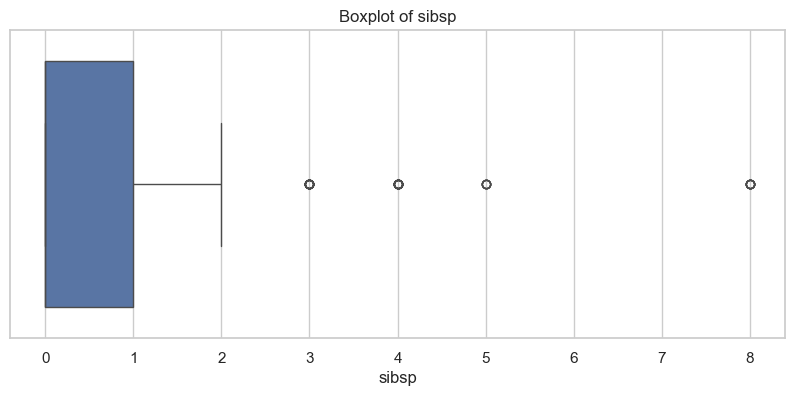

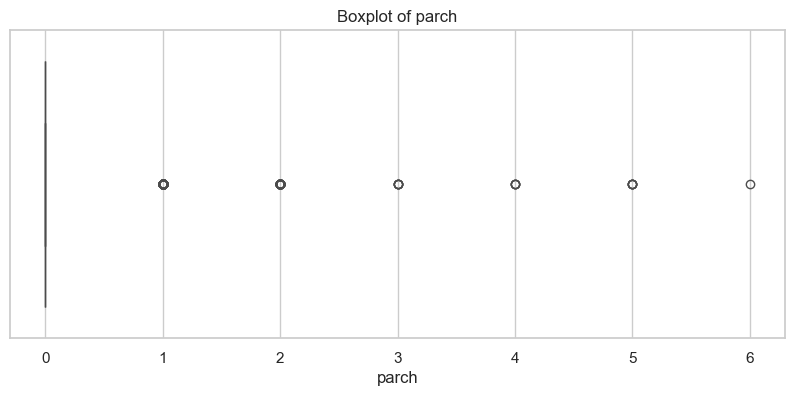

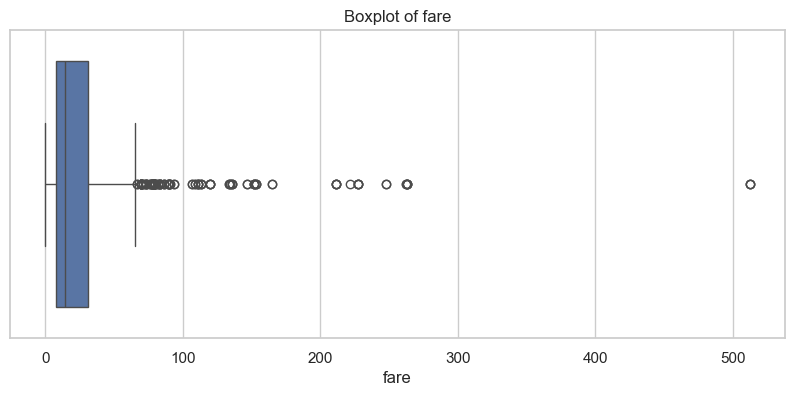

In [13]:
#outlier

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

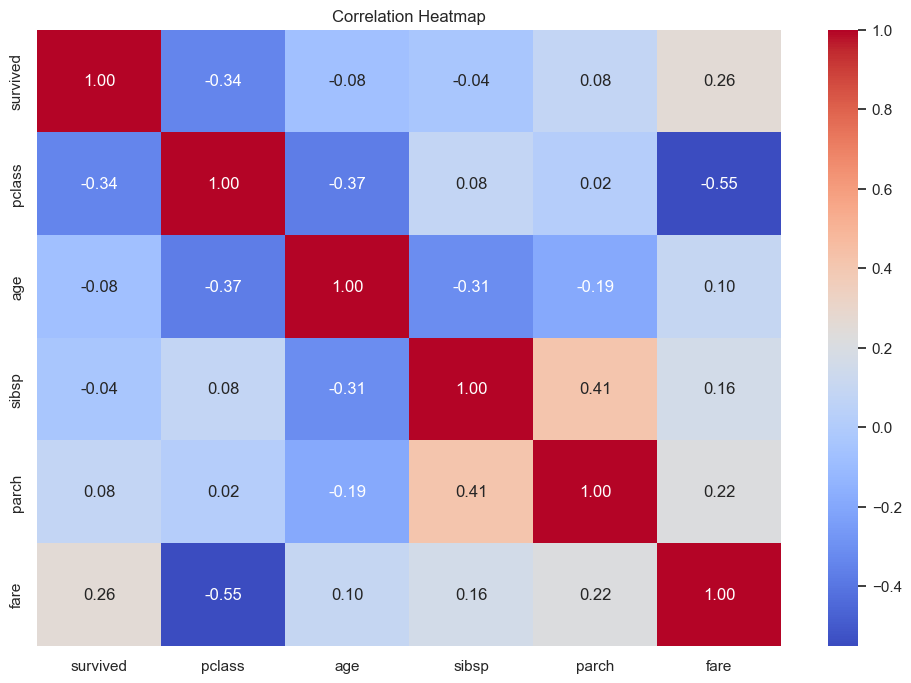

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

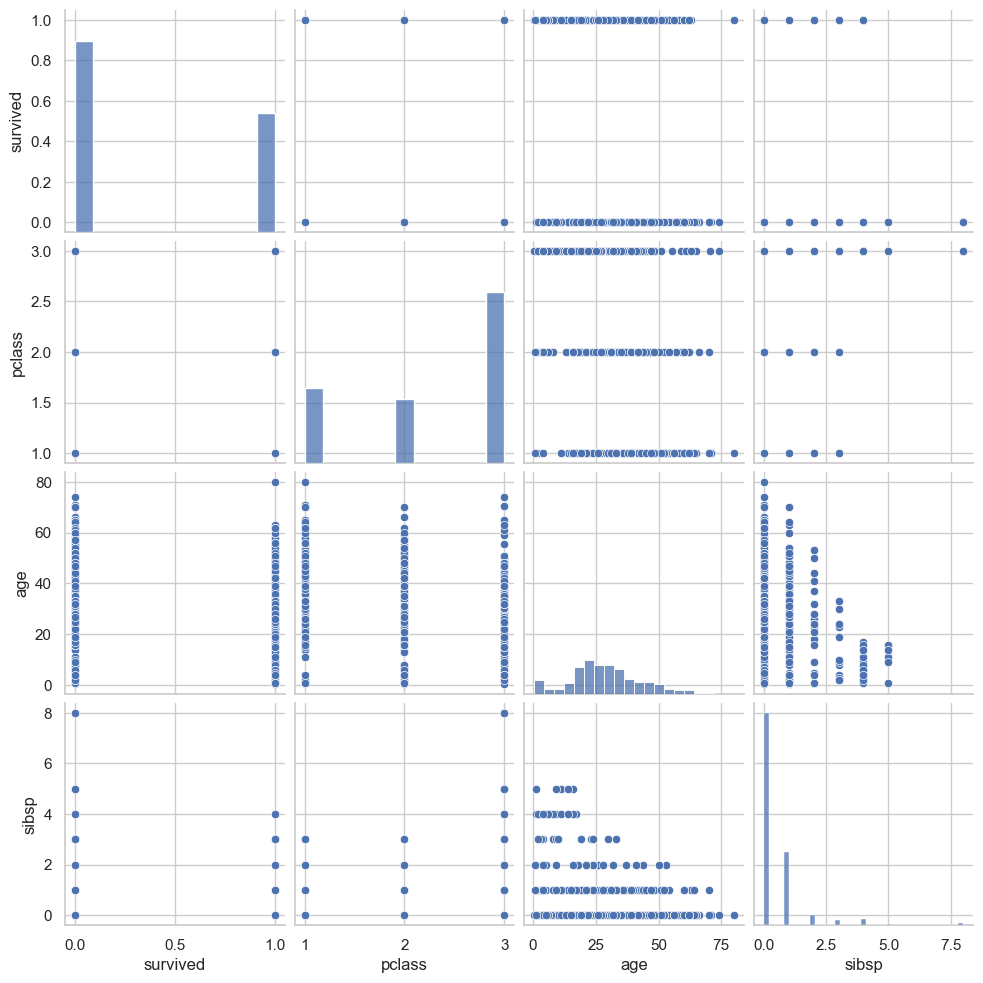

In [16]:
sns.pairplot(df[numerical_cols[:4]])
plt.show()

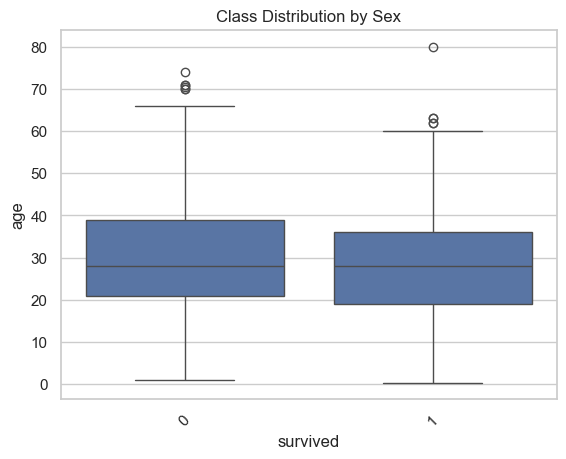

In [35]:
#categorucal vs numerical

sns.boxplot(x='survived', y='age', data=df)
plt.xticks(rotation=45)
plt.title('Class Distribution by Sex')
plt.show()

<Axes: title={'center': 'Average Class per Sex'}, xlabel='survived'>

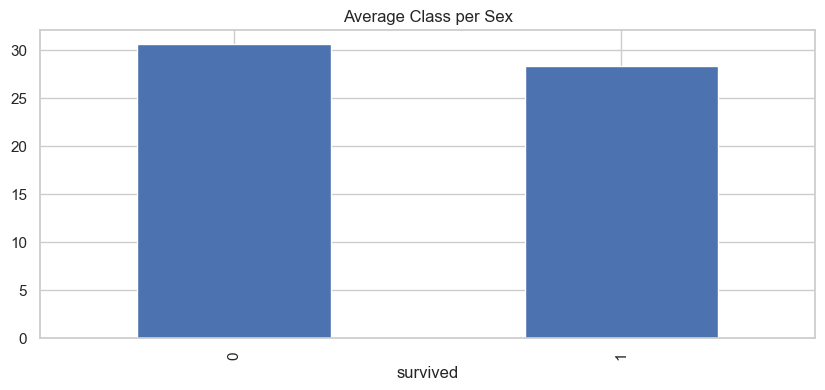

In [36]:
grouped = df.groupby('survived')['age'].mean().sort_values(ascending=False)
grouped.plot(kind='bar', figsize=(10, 4), title='Average Class per Sex')

<Axes: xlabel='survived', ylabel='class'>

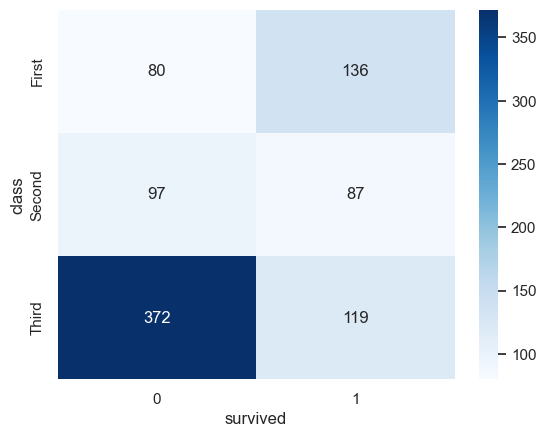

In [38]:
cross_tab = pd.crosstab(df['class'], df['survived'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

In [39]:
skewed_features = df[numerical_cols].skew().sort_values(ascending=False)
print("Highly skewed features:")
print(skewed_features[skewed_features >1])

Highly skewed features:
fare     4.787317
sibsp    3.695352
parch    2.749117
dtype: float64
